# <center>Breast cancer survival prediction</center>

### Table of contents

1. [Introduction](#introduction)
    1. [Survival analysis](#survival_analysis)
        1. [A few definitions](#definitions)
        2. [The Kaplan-Meier estimator](#kaplan_meier)
        3. [The log-rank test](#log_rank_test)
        4. [The Cox regression](#cox_regression)
2. [Data exploration](#data_exploration)
    1. [Python requirements](#python_requirements)
    2. [Getting the data](#getting_data)
    3. [Baseline model](#baseline_model)
3. [Submission](#submission)


## Introduction <a name="introduction"></a>

Breast cancer is one of the most common cancers and the second leading cause of cancer death among women in the United States. One in nine women will be diagnosed with breast cancer in her lifetime ([INCa avril 2016](https://www.ligue-cancer.net/article/26094_cancer-du-sein)). Approximately 70% of breast cancer patients are inoperable because of advanced tumor growth or bone metastasis [Min Tao et al.](https://pubmed.ncbi.nlm.nih.gov/21512769/). 

It is therefore crucial to be able to accurately diagnose the disease, and to better understand the aggravating factors. Here we propose to predict the survival based on the genetic factors of the tumour.

### Survival analysis <a name="survival_analysis"></a>

*[Survival analysis](https://en.wikipedia.org/wiki/Survival_analysis)* is a branch of statistics designed to model the life or activity time of a living being or device. Widely used in medicine and particularly in oncology, it allows to process data often *censored* over time. As far as oncology is concerned, for instance, it is inevitable that patients become out of reach or leave the study before the measured event (death, remission, metastasis, etc.): classic statistical tools such as regression are then poorly adapted and may underestimate the lifetimes studied. Here we intend to provide a brief and non-exhaustive overview of basic relevant statistical techniques that might be useful for the rest of the challenge.

#### A few definitions <a name="definitions"></a>

To make our introduction more readable, we can assume that time is a discrete variable i.e $t \in \{1,...,n\}$ with $n \in \mathbb{N}$.


Let $ \tau \geq 0$ be the random variable giving the time before a relevant event happen. We then wish to estimate the *survival function* $S$ which define  $\tau$, where $S$ is defined by :
$ {\displaystyle S(t)=\mathrm {Prob} (\tau >t)}$


We also make the assumption that the censors (the patients leaving the study) are non-informative (e.g. they don't have anything to do with the subject studied, e.g. can be considered random).

#### The Kaplan-Meier estimator <a name="kaplan_meier"></a>

The Kaplan-Meier estimator is one of the most classic tool of survival analysis. Indeed, it is a non-parametric estimator (eg.g it does not make any assumption on the data distribution accross time), quite simple to implement, and it uses the information from the censored lineage.
The Kaplan-Meier estimator can be written : 
${\displaystyle {\hat{S}}(t)=\prod_{i:t_{i}\leq t}\left(1-{\frac{d_{i}}{n_{i}}}\right)}$. 
 
where $t_i$ is a time when at least one event happened, $d_i$ the number of event at time ${\displaystyle t_{i}}$ and $n_i$ the individuals still in the study (neither dead nor censored) at time $t_i$.

Intuitively, the product to compute ${\hat{S}}(t)$ is on all time less than t, and thus allows to take into account all patients, even those *censored* before time $t$ because they got out of the reach of the study.


Visually, a representation of a Kaplan-Meier estimator gives a decreasing staircase function, depicting an estimation of the survival function $S(t)$ ($S$ is supposed to be constant between two events).

By allowing to estimate the survival function of a sample, the Kaplan-Meier estimator enables the comparison between two different samples (for instance between a medicated group and a control group). But to this aim, other methods can be more appropriate.

#### The log-rank test <a name="log_rank_test"></a>

The log-rank test is a non-parametric hypothesis test allowing to compare the survival functions of two different populations. In practice, it's used to quantify the survival differences between two populations which can be observed by plotting their Kaplan-Meier estimation.

Indeed, the log-rank test also allows to take into account censored lineage without loosing to much information.

A few notations :

For each time j, we write $N_{{1j}}$ and $N_{{2j}}$ the number of patients from each group in each group still studied at time j, and $N_{j}=N_{{1j}}+N_{{2j}}$. Let's write $O_{{1j}}$ and $O_{{2j}}$ the number of events (e.g deaths) in each group happening at time j, and similarly $O_{j}=O_{{1j}}+O_{{2j}}$.

The idea of the log-rank test is to test the null hypothesis "the two population have the same survival function".

Under this hypothesis, $O_{1j}$ follows an hypergeometric law with parameters $N_j$, $N_{1j}$ and $O_j$, and thus with expectation $E_{1j}$ and variance $V_j$.

The convergence being garanteed by the Central Limit Theorem (Lyapunov version), we can define the random variable $${\displaystyle Z={\frac {\sum _{j=1}^{J}(O_{1j}-E_{1j})}{\sqrt {\sum _{j=1}^{J}V_{j}}}}{\xrightarrow {\mathbb{L}}\ N(0,1).}}$$

It is then easy to quantify the ressemblance between the law of $Z$ and a standard normal law to see if the null hypothesis can be rejected.

#### The Cox regression<a name="cox_regression"></a>

The Cox regression is the equivalent of the logistic regression for survival analysis.
Let's define the *hazard rate*
$$\lambda(t)=\lim _{d t \rightarrow 0} \frac{\operatorname{Pr}(t \leq T<t+d t)}{d t \cdot S(t)}=-\frac{S^{\prime}(t)}{S(t)}$$
defined as the probability of dying at a certain time t given the fact that the patient survived until time t.
The Cox regression belong to the class of *proportional hazard models*, that is models which make the assumption that each unit increase for a covariate multiply the hazard rate of the patient by a fixed amount. For instance, taking a certain drug could halve the probability of dying from cancer at each time t.

This idea is formalized this way : 

Let $X_{i}=\left\{X_{i 1}, \ldots X_{i p}\right\}$ be the covariate values for a certain patient i.
Then we model the hazard rate $\lambda$ by 
<p style="color:#FF0000";>$${\lambda\left(t | X_{i}\right)=\lambda_{0}(t) \exp \left(\beta_{1} X_{i 1}+\cdots+\beta_{p} X_{i p}\right)=\lambda_{0}(t) \exp \left(X_{i} \cdot \beta\right)}$$</p>.

Let's  note that only the base hazard rate is time-dependant : the effect of each covariate on the *hazard rate* is assumed to be the same across time.

This property is the main "trick" of Cox regression : it allows to get rid of the hard-to-estimate hazard rate by taking a ratio. To be more precise, the likelihood of an event to be observed on patient i at time $Y_i$ is $$L_{i}(\beta)=\frac{\lambda\left(Y_{i} | X_{i}\right)}{\sum_{j : Y_{j} \geq Y_{i}} \lambda\left(Y_{i} | X_{j}\right)}=\frac{\lambda_{0}\left(Y_{i}\right) \theta_{i}}{\sum_{j : Y_{j} \geq Y_{i}} \lambda_{0}\left(Y_{i}\right) \theta_{j}}=\frac{\theta_{i}}{\sum_{j : Y_{j} \geq Y_{i}} \theta_{j}},$$ with $\theta_{j}=\exp \left(X_{j} \cdot\beta\right)$ and the summation being on all the patient still alive and in the study at time $Y_i$.

Skipping the most technical details, the idea is then to model all patients as independant and to maximize the product likekihood.

# TODO

Parler du [survival analysis](https://en.wikipedia.org/wiki/Survival_analysis) , en particulier avec des données censurées à droite (ce qui est notre cas : cela correspond à toutes les données pour lesquelles on a ```event = 0 ```, c'est à dire qu'on a perdu la trace du patient). On peut se baser sur toute la doc de ces deux libraries Python, qui englobe tous les points de notre projet, avec notamment des exemples d'analyse de A à Z, depuis la data exploration jusqu'au choix du modèle et de la métrique : 

+ scikit-survival
+ pysurvival

## Data exploration <a name="data_exploration"></a>

### Python requirements <a name="python_requirements"></a>

In order to collect and analyse the data, the following Python libraries are required :



In [1]:
with open('requirements.txt', 'r') as requirements:
    print(requirements.read())

# Generic requirements
numpy
pandas

# Gather the data
mygene
xenaPython



Which can be installed (under Linux) with :

In [47]:
%%capture
!pip install -r requirements.txt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Gather the data <a name="getting_data"></a>

First, you have to download the data, by running :

In [4]:
!python download_data.py

/home/stephane/anaconda3/envs/sb/lib/python3.8/site-packages/xenaPython/__init__.py:110: FutureWarning: Possible nested set at position 7
  re.sub(r"^[^[]+[[]([^]]*)[]].*$", r"\1", query, flags=re.DOTALL))
data/train were already downloaded.
data/test were already downloaded.


In [3]:
from problem import get_train_data, get_test_data
X_train, y_train = get_train_data()
X_test, y_test = get_test_data()

Note : Although 55511 genes were listed, the data for "only" 37498 genes are available.

We also note the two last columns :

+ ```death``` can take two values : 
    + ```1``` means the patient died
    + ```0``` means the patient was censored
+ ```time``` is equal to the time of the event (either death or censoring)

Thus, instead of having two variables ```X``` and ```y```, we have three variables ```X```, ```y``` and ```E``` constructed as follows :

In [6]:
df['death'].value_counts()


0    997
1    197
Name: death, dtype: int64

### A first feature : the correlation with the survival time

A first idea would be to select only those genes that are most correlated, in absolute terms, with survival time. To do this, uncensored patients are filtered out and the correlation with survival time of each gene from the remaining patients is computed. 

In [32]:
X_train.drop(columns=['index'],inplace=True)

In [44]:
X_uncensored = X_train[X_train['death']==1]
print('They are %i uncensored patients' %len(X_uncensored))

They are 153 uncensored patients


We compute the correlation for those patients.

Pearson correlation relies on the assumption that the variable are a normally distributed, which is clearly not the case here.

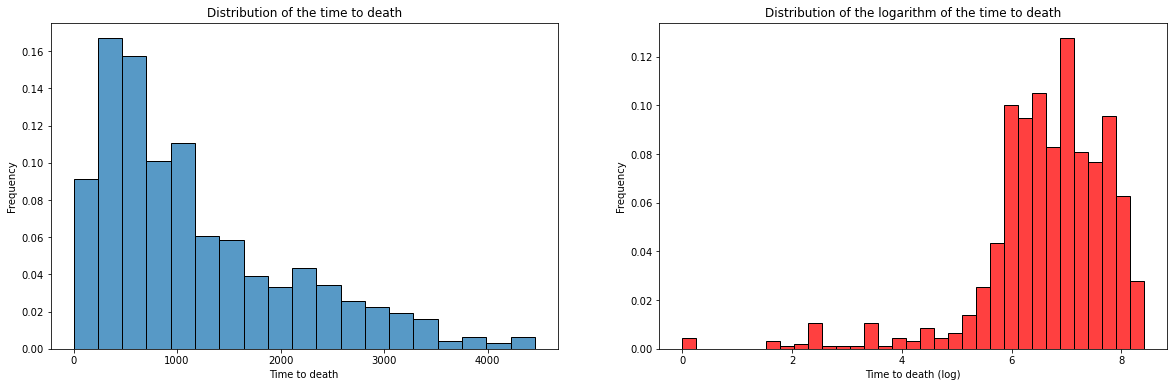

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
sns.histplot(y_train['time'].to_numpy(), ax=ax1, stat='probability')
ax1.set_title('Distribution of the time to death')
ax1.set_xlabel('Time to death')
ax1.set_ylabel('Frequency')

sns.histplot(np.log(y_train['time'].to_numpy()), ax=ax2, stat='probability', color='r')
ax2.set_title('Distribution of the logarithm of the time to death')
ax2.set_xlabel('Time to death (log)')
ax2.set_ylabel('Frequency')
plt.show()

The logarithmic transformation slightly improves the time distribution and makes it a little more normal.
Let's compute the correlation of the expression of each gene with the time to death.

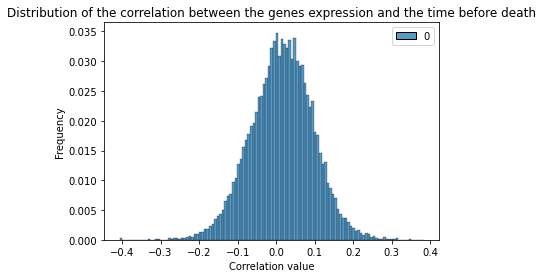

In [225]:
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import pylab

# First we remove the mean and we scale each gene expression data to unit variance
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_uncensored)
scaled_df = pd.DataFrame(data=scaled_X_train)

# Then we compute the correlations
correlations = scaled_df.corrwith(np.log(y_train['time']))
np_correlations = correlations.dropna().to_numpy().reshape(-1,1)

sns.histplot(np_correlations, stat='probability', color='green')
plt.title('Distribution of the correlation between the genes expression and the time before death')
plt.xlabel('Correlation value')
plt.ylabel('Frequency')
plt.show()

At first glance, the distribution of correlations seems close to the normal law... The comparison between the two laws can be refined by means of a Q-Q plot.

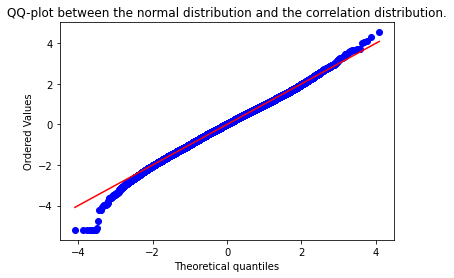

In [224]:
scaled_correlations = scaler.fit_transform(np_correlations)
stats.probplot(scaled_correlations.flatten(), dist="norm",plot=pylab)
pylab.title('QQ-plot between the normal distribution and the correlation distribution.')
pylab.show()

Some ideas :
+ Study the gene expression distributions, those who are very expressed, those who aren't...
+ Study the correlations among the gene expression
+ Study the difference of gene expression (those with the biggest difference for example) between alive patients and dead patients
 
 ...

In [8]:
# Building training and testing sets
N = len(df1)
from sklearn.model_selection import train_test_split
index_train, index_test = train_test_split( range(N), test_size = 0.2, random_state=10)
data_train = df1.loc[index_train].reset_index( drop = True )
data_test  = df1.loc[index_test].reset_index( drop = True )

In [9]:
print(data_train['death'].value_counts())
print(data_test['death'].value_counts())
E_train, E_test = data_train.pop('death'), data_test.pop('death')
y_train, y_test = data_train.pop('time'), data_test.pop('time')
X_train, X_test = data_train, data_test

0    787
1    153
Name: death, dtype: int64
0    195
1     41
Name: death, dtype: int64


Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 1099.933 - ||grad||^2 = 741.35654
 * Iteration #2 - Loss = 931.325 - ||grad||^2 = 517.41062
 * Iteration #3 - Loss = 907.907 - ||grad||^2 = 462.28117
 * Iteration #4 - Loss = 891.173 - ||grad||^2 = 414.47922
 * Iteration #5 - Loss = 878.614 - ||grad||^2 = 372.42091
 * Iteration #6 - Loss = 868.877 - ||grad||^2 = 335.11937
 * Iteration #7 - Loss = 861.149 - ||grad||^2 = 301.87202
 * Iteration #8 - Loss = 854.904 - ||grad||^2 = 272.13897
 * Iteration #9 - Loss = 849.784 - ||grad||^2 = 245.48535
 * Iteration #10 - Loss = 845.537 - ||grad||^2 = 221.54992
 * Iteration #11 - Loss = 841.977 - ||grad||^2 = 200.02627
 * Iteration #12 - Loss = 838.970 - ||grad||^2 = 180.65074
 * Iteration #13 - Loss = 836.409 - ||grad||^2 = 163.19397
 * Iteration #14 - Loss = 834.215 - ||grad||^2 = 147.45491
 * Iteration #15 - Loss = 832.325 - ||grad||^2 = 133.25629
 * Iteration #16 - Loss = 830.689 - ||grad||^2 = 120.44106
 * Iteration #17 - Loss =

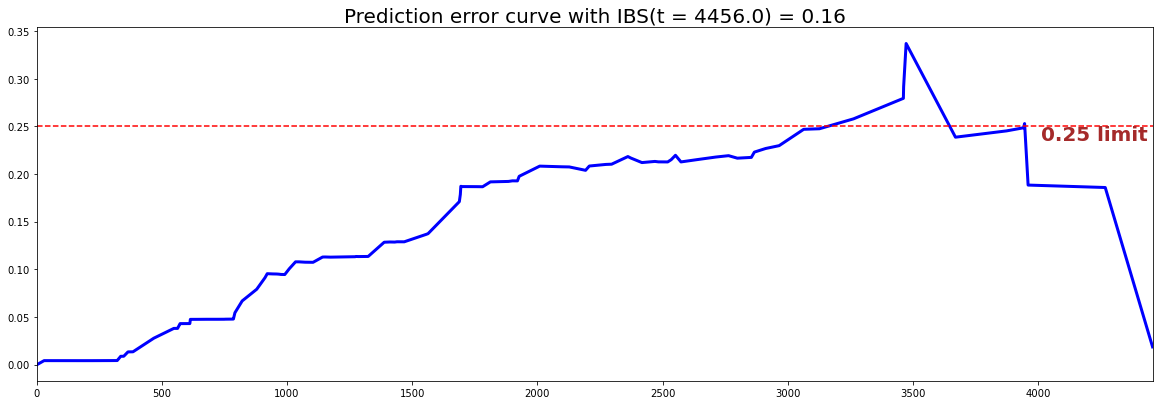

In [12]:
from pysurvival.models.survival_forest import ConditionalSurvivalForestModel
from pysurvival.models.semi_parametric import CoxPHModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.metrics import integrated_brier_score as ib_score
from pysurvival.utils.display import integrated_brier_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

pca = PCA(n_components=10)
pca.fit(X_train)
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

#lr = LinearRegression().fit(X_train, y_train)
#c_index = concordance_index(lr, X_test_transformed, y_test, E_test)
#print('C-index: {:.2f}'.format(c_index)) #0.1
#ibs = ib_score(lr, X_test_transformed, y_test, E_test, t_max=max_time)
#print(ibs)

coxph = CoxPHModel()
coxph.fit(X_train_transformed, y_train, E_train, lr=0.1, l2_reg=1e-1, max_iter=1000)
c_index = concordance_index(coxph, X_test_transformed, y_test, E_test)
print('C-index: {:.2f}'.format(c_index)) #0.1
ibs = ib_score(coxph, X_test_transformed, y_test, E_test, t_max=max_time)
print('IBS: {:.9f}'.format(ibs)) 
integrated_brier_score(coxph, X_test_transformed, y_test, E_test, t_max=max_time, figure_size=(20, 6.5))

# Fitting the model
csf = ConditionalSurvivalForestModel(num_trees=10)
csf.fit(X_train_transformed, y_train, E_train, max_features='sqrt')

from pysurvival.utils.display import display_loss_values
#display_loss_values(csf, figure_size=(7, 4))


[0.0]


% Completion: 100%|***********************************************|Loss: 887.24


[   0.           24.63115578   49.26231156   73.89346734   98.52462312
  123.15577889  147.78693467  172.41809045  197.04924623  221.68040201
  246.31155779  270.94271357  295.57386935  320.20502513  344.8361809
  369.46733668  394.09849246  418.72964824  443.36080402  467.9919598
  492.62311558  517.25427136  541.88542714  566.51658291  591.14773869
  615.77889447  640.41005025  665.04120603  689.67236181  714.30351759
  738.93467337  763.56582915  788.19698492  812.8281407   837.45929648
  862.09045226  886.72160804  911.35276382  935.9839196   960.61507538
  985.24623116 1009.87738693 1034.50854271 1059.13969849 1083.77085427
 1108.40201005 1133.03316583 1157.66432161 1182.29547739 1206.92663317
 1231.55778894 1256.18894472 1280.8201005  1305.45125628 1330.08241206
 1354.71356784 1379.34472362 1403.9758794  1428.60703518 1453.23819095
 1477.86934673 1502.50050251 1527.13165829 1551.76281407 1576.39396985
 1601.02512563 1625.65628141 1650.28743719 1674.91859296 1699.54974874
 1724.18

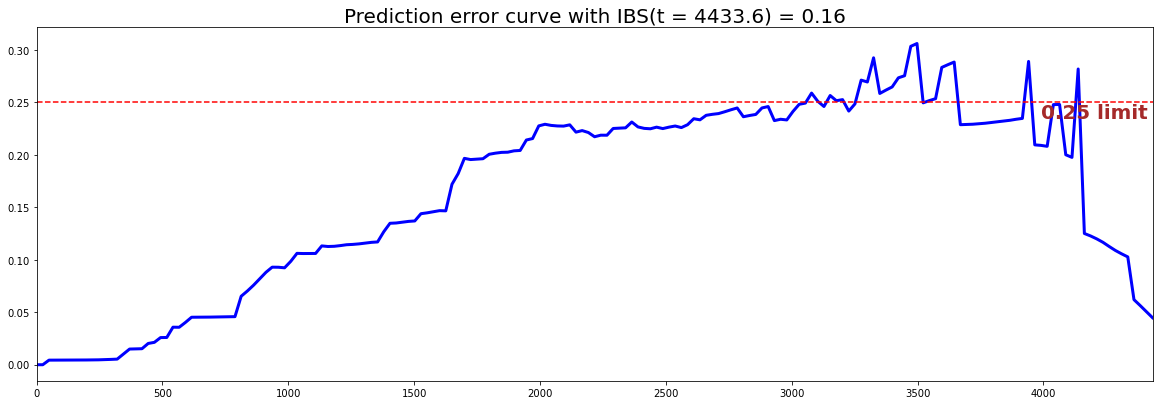

0.16476584981993214

In [50]:
from pysurvival.models.multi_task import LinearMultiTaskModel
import numpy as np
lmtm = LinearMultiTaskModel(bins=200)
lmtm.fit(X_train_transformed, y_train, E_train, lr=0.0001, l2_reg=1e-1,num_epochs=1000)
print(lmtm.times)
c_index = concordance_index(lmtm, X_test_transformed, y_test, E_test)
print('C-index: {:.2f}'.format(c_index)) #0.1
ibs = ib_score(lmtm, X_test_transformed, y_test, E_test, t_max=max_time)
print('IBS: {:.9f}'.format(ibs)) 
integrated_brier_score(lmtm, X_test_transformed, y_test, E_test, t_max=max_time, figure_size=(20, 6.5))

In [53]:
i = lmtm.predict_survival(X_test_transformed)
ibs = ib_score(i, X_test_transformed, y_test, E_test, t_max=max_time)

AttributeError: 'numpy.ndarray' object has no attribute 'predict_survival'

In [62]:
df_to_melt = pd.concat([E_train, y_train], axis=1)
print(df_to_melt)

     death  time
0        0   931
1        0    21
2        0   702
3        0   435
4        0    11
..     ...   ...
935      0  1004
936      0   149
937      1   991
938      0  1742
939      0  1351

[940 rows x 2 columns]


In [107]:
import pdb as pdb
def to_structured_array(E_df, y_df):
    E = E_df.to_numpy().astype(bool)
    y = y_df.to_numpy()
    w = np.column_stack((E, y))
    w = w.ravel().view([('event', w[0].dtype), ('time', y.dtype)]).astype('bool, <i8')
    return w

In [111]:
from sksurv.metrics import concordance_index_ipcw
risk = lmtm.predict_risk(X_test_transformed)
s_train, s_test = to_structured_array(E_train, y_train), to_structured_array(E_test, y_test)
concordance_index_ipcw(s_train, s_test, risk)
test_risk = - y_test + 4500
print(concordance_index_ipcw(s_train, s_test, test_risk))

(0.9999324283449557, 4218, 0, 2, 2)


In [ ]:
from pysurvival.utils.metrics import concordance_index
c_index = concordance_index(csf, X_test_transformed, y_test, E_test)
print('C-index: {:.2f}'.format(c_index)) #0.92

In [ ]:
from pysurvival.utils.display import integrated_brier_score
ibs = integrated_brier_score(csf, X_test_transformed, y_test, E_test, t_max=10000,
                       figure_size=(20, 6.5) )
print('IBS: {:.9f}'.format(ibs)) #0.92

### Baseline model <a name="baseline_model"></a>



## Metric

We could use Integrated Brier Score (https://square.github.io/pysurvival/metrics/brier_score.html)



## Submission <a name="submission"></a>